In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sn
from scipy import stats

In [2]:
# Importing tables 

titleRatings = pd.read_table(r"C:\Users\finng\OneDrive\Desktop\school\y32023-24\sTwo\Database\project\datasets\dataset\title.ratings.tsv")
titleRatings['averageRating'] = pd.to_numeric(titleRatings['averageRating'])
titleRatings['numVotes'] = pd.to_numeric(titleRatings['numVotes'])
titleBasics = pd.read_table(r"C:\Users\finng\OneDrive\Desktop\school\y32023-24\sTwo\Database\project\datasets\dataset\title.basics.tsv",low_memory=False)

In [3]:
# Adjusting data types

titleBasics['isAdult'] = titleBasics['isAdult'].astype(bool)
titleBasics['startYear'] = pd.to_numeric(titleBasics['startYear'].astype(str).str.replace('\.0', ''), errors='coerce').astype('Int64')
titleBasics['runtimeMinutes'] = pd.to_numeric(titleBasics['runtimeMinutes'], errors='coerce')

In [4]:
# Renaming columns

titleBasics.drop(columns='endYear', inplace=True)
titleBasics.rename(columns={'startYear': 'year'}, inplace=True)
titleBasics.rename(columns={'tconst': 'titleID'}, inplace=True)
titleRatings.rename(columns={'tconst': 'titleID'}, inplace=True)
titleBasics['titleID'] = titleBasics['titleID'].astype(str)
titleRatings['titleID'] = titleRatings['titleID'].astype(str)

In [5]:
# Creating mediaGenre table

mediaGenres = titleBasics[['titleID', 'genres']].copy()
mediaGenres = mediaGenres.assign(genres=mediaGenres['genres'].str.split(',')).explode('genres')
titleBasics.drop(columns='genres', inplace=True)
print(mediaGenres.head(10))
mediaGenres.describe()

     titleID       genres
0  tt0000001  Documentary
0  tt0000001        Short
1  tt0000002    Animation
1  tt0000002        Short
2  tt0000003    Animation
2  tt0000003       Comedy
2  tt0000003      Romance
3  tt0000004    Animation
3  tt0000004        Short
4  tt0000005       Comedy


,titleID,genres
count,16767644,16767626
unique,10517947,29
top,tt2065101,Drama
freq,3,2989817


In [6]:
# Missing value analysis on mediaGenres

missing_values = mediaGenres.isnull().sum()
total_values = mediaGenres.shape[0]
percentage_missing = (missing_values / total_values) * 100
missing_report = pd.DataFrame({'Missing Values': missing_values, 'Total Values': total_values, 'Percentage Missing': percentage_missing})
print(missing_report)

         Missing Values  Total Values  Percentage Missing
titleID               0      16767644            0.000000
genres               18      16767644            0.000107


In [7]:
# Filling in missing values

mediaGenres['genres'] = mediaGenres['genres'].fillna('Unknown')

In [8]:
# Missing value analysis on mediaGenres

missing_values = mediaGenres.isnull().sum()
total_values = mediaGenres.shape[0]
percentage_missing = (missing_values / total_values) * 100
missing_report = pd.DataFrame({'Missing Values': missing_values, 'Total Values': total_values, 'Percentage Missing': percentage_missing})
print(missing_report)

         Missing Values  Total Values  Percentage Missing
titleID               0      16767644                 0.0
genres                0      16767644                 0.0


In [62]:
# Printing Ratings and describing table values

print(titleRatings.head(10))
titleRatings.describe()

     titleID  averageRating  numVotes
0  tt0000001            5.7      2017
1  tt0000002            5.7       270
2  tt0000003            6.5      1943
3  tt0000004            5.4       178
4  tt0000005            6.2      2721
5  tt0000006            5.0       184
6  tt0000007            5.4       847
7  tt0000008            5.4      2168
8  tt0000009            5.3       209
9  tt0000010            6.8      7412


,averageRating,numVotes
count,1.396382e+06,1.396382e+06
mean,6.955899e+00,1.037109e+03
std,1.385630e+00,1.763894e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.100000e+00,2.600000e+01
75%,7.900000e+00,1.010000e+02
max,1.000000e+01,2.849811e+06


In [10]:
# Missing value analysis on titleRatings

missing_values = titleRatings.isnull().sum()
total_values = titleRatings.shape[0]
percentage_missing = (missing_values / total_values) * 100
missing_report = pd.DataFrame({'Missing Values': missing_values, 'Total Values': total_values, 'Percentage Missing': percentage_missing})
print(missing_report)

               Missing Values  Total Values  Percentage Missing
titleID                     0       1396382                 0.0
averageRating               0       1396382                 0.0
numVotes                    0       1396382                 0.0


In [11]:
# Printing Media info and describing table values

print(titleBasics.head(10))
titleBasics.describe()

     titleID titleType                                 primaryTitle  \
0  tt0000001     short                                   Carmencita   
1  tt0000002     short                       Le clown et ses chiens   
2  tt0000003     short                               Pauvre Pierrot   
3  tt0000004     short                                  Un bon bock   
4  tt0000005     short                             Blacksmith Scene   
5  tt0000006     short                            Chinese Opium Den   
6  tt0000007     short  Corbett and Courtney Before the Kinetograph   
7  tt0000008     short       Edison Kinetoscopic Record of a Sneeze   
8  tt0000009     movie                                   Miss Jerry   
9  tt0000010     short                          Leaving the Factory   

                                 originalTitle  isAdult  year  runtimeMinutes  
0                                   Carmencita     True  1894             1.0  
1                       Le clown et ses chiens     True  1

,year,runtimeMinutes
count,9123722.0,3.201119e+06
mean,2005.570427,4.362901e+01
std,20.09955,7.383230e+01
min,1874.0,0.000000e+00
25%,2001.0,1.900000e+01
50%,2013.0,3.000000e+01
75%,2018.0,6.000000e+01
max,2031.0,5.432100e+04


In [12]:
# Missing value analysis on titleBasics

missing_values = titleBasics.isnull().sum()
total_values = titleBasics.shape[0]
percentage_missing = (missing_values / total_values) * 100
missing_report = pd.DataFrame({'Missing Values': missing_values, 'Total Values': total_values, 'Percentage Missing': percentage_missing})
print(missing_report)

                Missing Values  Total Values  Percentage Missing
titleID                      0      10517947            0.000000
titleType                    0      10517947            0.000000
primaryTitle                17      10517947            0.000162
originalTitle               17      10517947            0.000162
isAdult                      0      10517947            0.000000
year                   1394225      10517947           13.255676
runtimeMinutes         7316828      10517947           69.565173


In [13]:
# Filling in missing values

mean_year = int(titleBasics['year'].mean())
titleBasics['year'] = titleBasics['year'].fillna(mean_year)

mean_minutes = int(titleBasics['runtimeMinutes'].mean())
titleBasics['runtimeMinutes'] = titleBasics['runtimeMinutes'].fillna(mean_minutes)

In [14]:
# Missing value analysis on titleBasics

missing_values = titleBasics.isnull().sum()
total_values = titleBasics.shape[0]
percentage_missing = (missing_values / total_values) * 100
missing_report = pd.DataFrame({'Missing Values': missing_values, 'Total Values': total_values, 'Percentage Missing': percentage_missing})
print(missing_report)

                Missing Values  Total Values  Percentage Missing
titleID                      0      10517947            0.000000
titleType                    0      10517947            0.000000
primaryTitle                17      10517947            0.000162
originalTitle               17      10517947            0.000162
isAdult                      0      10517947            0.000000
year                         0      10517947            0.000000
runtimeMinutes               0      10517947            0.000000


In [15]:
# Extracting the five most frequent genres

mediaGenres['genres'].mode()
mediaGenres['genres'].value_counts()
frequentGenres = list(mediaGenres['genres'].value_counts().index.tolist()[:5])
genreFrequencies = list(mediaGenres['genres'].value_counts().tolist()[:5])
print(frequentGenres)
print(genreFrequencies)

['Drama', 'Comedy', 'Talk-Show', 'Short', 'Documentary']
[2989817, 2089442, 1291744, 1146300, 996442]


In [38]:
# Function to detect outliers using Z-Score for a specific column
def detect_outliers_zscore(data, column):
    z_scores = stats.zscore(data[column])
    outliers = data.index[z_scores > 2]  # Adjust threshold as needed
    return outliers

# Detect outliers for 'averageRating' column
outliers_average_rating = detect_outliers_zscore(titleRatings, 'averageRating')
print("Indices of rows containing outliers for 'averageRating' column:", outliers_average_rating)
print("\nDetails of outlier rows for 'averageRating' column:")
print(titleRatings.loc[outliers_average_rating])

Indices of rows containing outliers for 'averageRating' column: Index([  36438,   37209,   37474,   37487,   37746,   38114,   39385,   40396,
         42036,   43990,
       ...
       1393751, 1393795, 1393939, 1394279, 1394699, 1395139, 1395349, 1395399,
       1395460, 1395519],
      dtype='int64', length=11646)

Details of outlier rows for 'averageRating' column:
           titleID  averageRating  numVotes
36438    tt0057092            9.8        15
37209    tt0057955            9.9        27
37474    tt0058258            9.8        21
37487    tt0058271           10.0        12
37746    tt0058559           10.0        14
...            ...            ...       ...
1395139  tt9882156            9.8        14
1395349  tt9889628           10.0         5
1395399  tt9890390            9.8         6
1395460  tt9892336           10.0       300
1395519  tt9893704           10.0         8

[11646 rows x 3 columns]


In [61]:
# Detect outliers for 'runtimeMinutes' column

outliers_runtimeMinutes = detect_outliers_zscore(titleBasics, 'runtimeMinutes')
print("Indices of rows containing outliers for 'runtimeMinutes' column:", outliers_runtimeMinutes)
print("\nDetails of outlier rows for 'runtimeMinutes' column:")
print(titleBasics.loc[outliers_runtimeMinutes])

Indices of rows containing outliers for 'runtimeMinutes' column: Index([    2547,     2578,     2871,     3130,     3561,     3639,     3704,
           3856,     4009,     4222,
       ...
       10516081, 10516617, 10516910, 10517035, 10517150, 10517153, 10517365,
       10517404, 10517569, 10517660],
      dtype='int64', length=97303)

Details of outlier rows for 'runtimeMinutes' column:
            titleID  titleType                             primaryTitle  \
2547      tt0002574      movie                    What Happened to Mary   
2578      tt0002605      movie                The Adventures of Kathlyn   
2871      tt0002898      movie          Germinal; or, The Toll of Labor   
3130      tt0003159      movie          Les Misérables, Part 2: Fantine   
3561      tt0003596      movie  The Active Life of Dolly of the Dailies   
...             ...        ...                                      ...   
10517153  tt9915102      video                                HUNT: 753   
105173

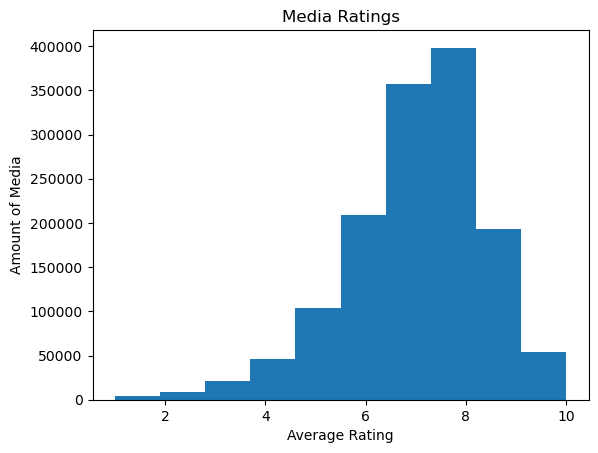

In [48]:
# Plotting number of types of ratings 

plt.hist(titleRatings['averageRating'])
plt.title('Media Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Amount of Media')
plt.show()

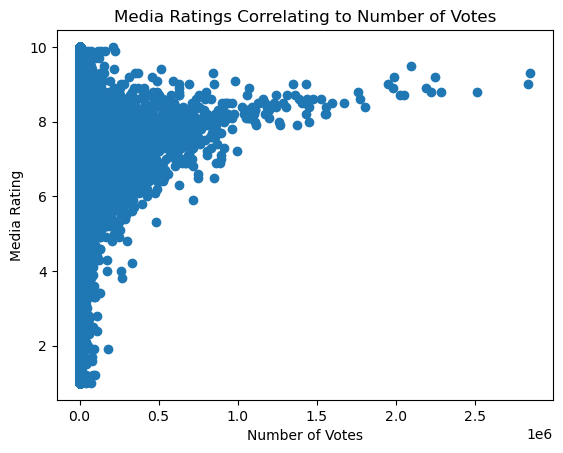

In [29]:
# Plotting average rating correlating to the number of votes

plt.scatter(titleRatings['numVotes'], titleRatings['averageRating'])
plt.title('Media Ratings Correlating to Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Media Rating')
plt.show()

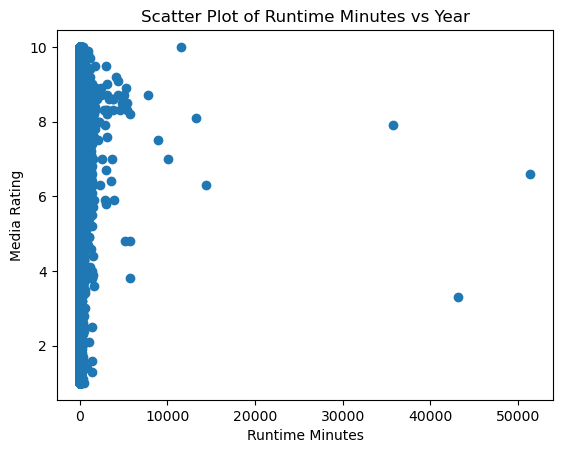

In [30]:
# Plotting average rating correlating to endYear

merged_data = pd.merge(titleRatings, titleBasics, on='titleID', how='inner')
plt.scatter(merged_data['runtimeMinutes'], merged_data['averageRating'])
plt.xlabel('Runtime Minutes')
plt.ylabel('Media Rating')
plt.title('Scatter Plot of Runtime Minutes vs Year')
plt.show()

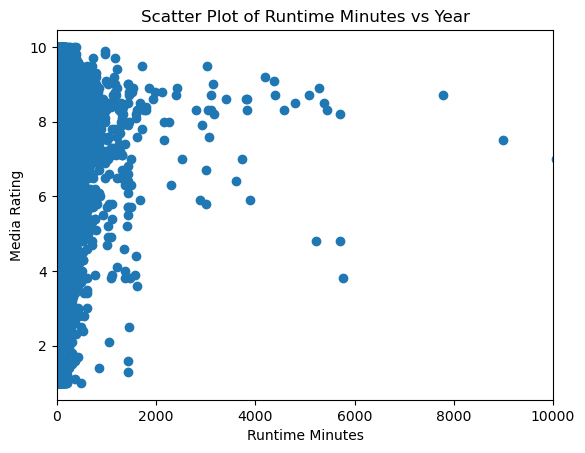

In [31]:
# Plotting average rating correlating to endYear

merged_data = pd.merge(titleRatings, titleBasics, on='titleID', how='inner')
plt.scatter(merged_data['runtimeMinutes'], merged_data['averageRating'])
plt.xlim(0, 10000)
plt.xlabel('Runtime Minutes')
plt.ylabel('Media Rating')
plt.title('Scatter Plot of Runtime Minutes vs Year')
plt.show()

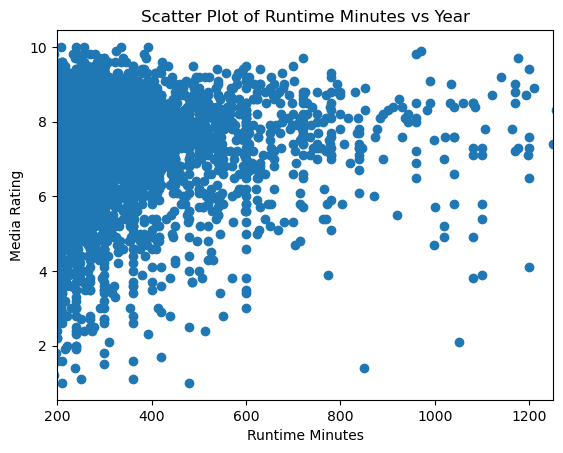

In [52]:
# Plotting average rating correlating to endYear

merged_data = pd.merge(titleRatings, titleBasics, on='titleID', how='inner')
plt.scatter(merged_data['runtimeMinutes'], merged_data['averageRating'])
plt.xlim(200, 1250)
plt.xlabel('Runtime Minutes')
plt.ylabel('Media Rating')
plt.title('Scatter Plot of Runtime Minutes vs Year')
plt.show()

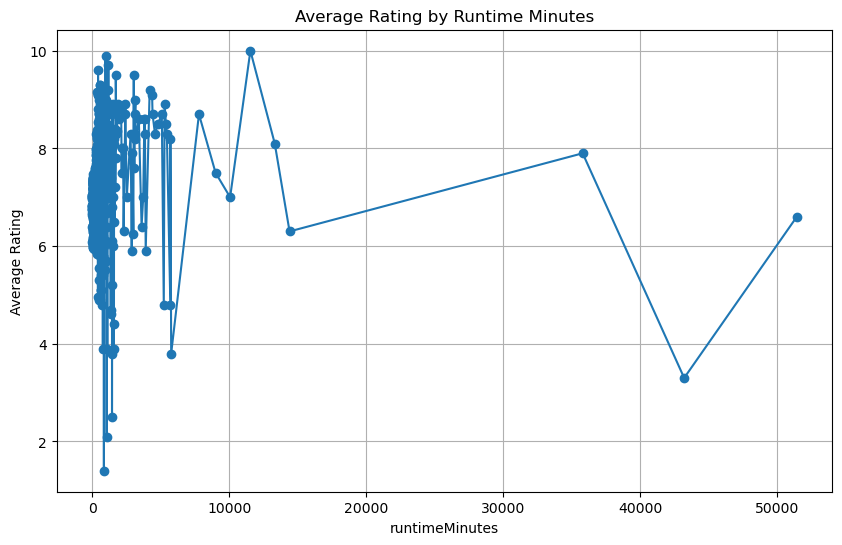

In [53]:
# Average Rating by Runtime Minutes

merged_data = pd.merge(titleRatings, titleBasics, on='titleID', how='inner')
average_ratings_by_runtimeMinutes = merged_data.groupby('runtimeMinutes')['averageRating'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_ratings_by_runtimeMinutes.index, average_ratings_by_runtimeMinutes.values, marker='o', linestyle='-')
plt.xlabel('runtimeMinutes')
plt.ylabel('Average Rating')
plt.title('Average Rating by Runtime Minutes')
plt.grid(True)
plt.show()

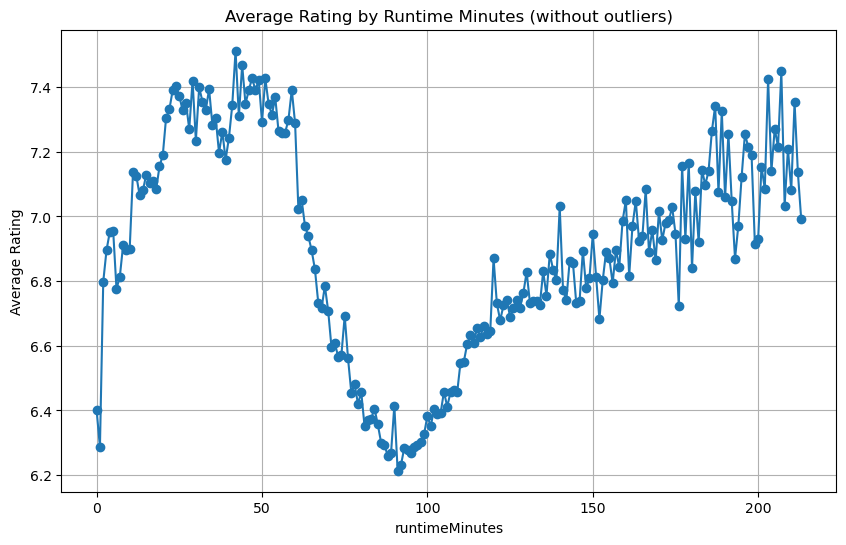

In [55]:
# Define a function to remove outliers based on Z-score for multiple columns

def remove_outliers_zscore(data, columns):
    z_scores = np.abs(stats.zscore(data[columns]))
    threshold = 2  # Adjust threshold as needed
    return data[(z_scores <= threshold).all(axis=1)]

# Average Rating by Runtime Minutes (without outliers)

merged_data_no_outliers = remove_outliers_zscore(merged_data, ['averageRating', 'runtimeMinutes'])
average_ratings_by_runtimeMinutes = merged_data_no_outliers.groupby('runtimeMinutes')['averageRating'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_ratings_by_runtimeMinutes.index, average_ratings_by_runtimeMinutes.values, marker='o', linestyle='-')
plt.xlabel('runtimeMinutes')
plt.ylabel('Average Rating')
plt.title('Average Rating by Runtime Minutes (without outliers)')
plt.grid(True)
plt.show()

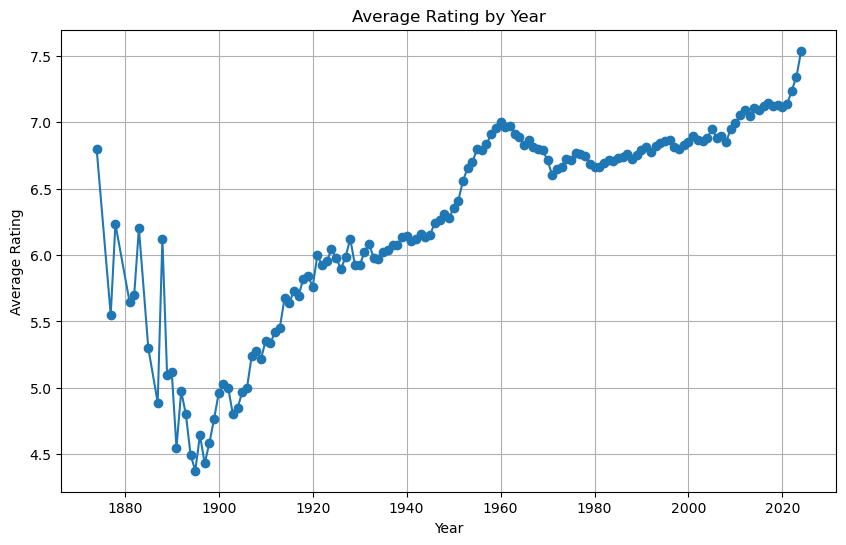

In [34]:
# Merge titleRatings and titleBasics on titleID
merged_data = pd.merge(titleRatings, titleBasics, on='titleID', how='inner')

# Group by 'year' and calculate the mean of 'averageRating' for each year
average_ratings_by_year = merged_data.groupby('year')['averageRating'].mean()

# Plot the average ratings by year
plt.figure(figsize=(10, 6))
plt.plot(average_ratings_by_year.index, average_ratings_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Year')
plt.grid(True)
plt.show()

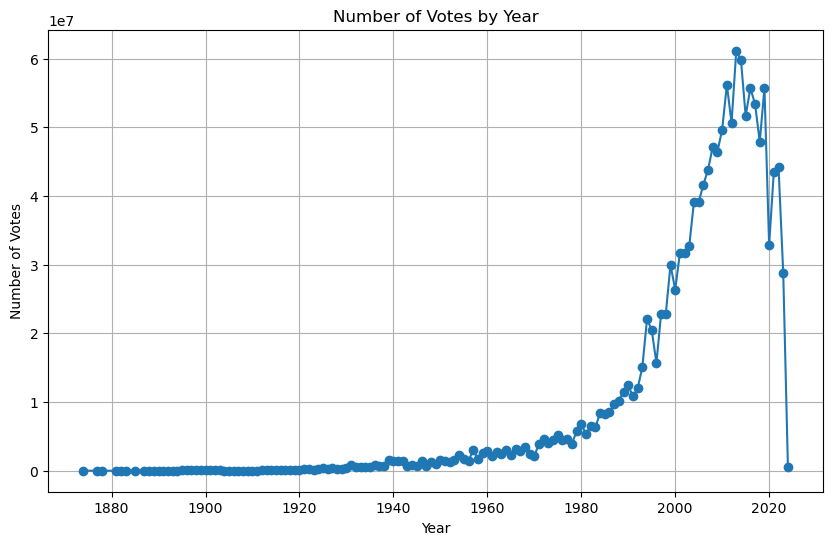

In [50]:
# Merge titleRatings and titleBasics on titleID
merged_data = pd.merge(titleRatings, titleBasics, on='titleID', how='inner')

# Group by 'year' and calculate the mean of 'averageRating' for each year
average_ratings_by_year = merged_data.groupby('year')['numVotes'].sum()

# Plot the average ratings by year
plt.figure(figsize=(10, 6))
plt.plot(average_ratings_by_year.index, average_ratings_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.title('Number of Votes by Year')
plt.grid(True)
plt.show()

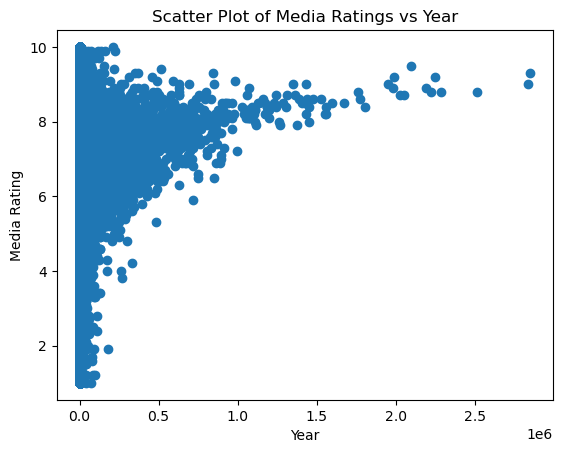

In [51]:
# Plotting average rating correlating to endYear

merged_data = pd.merge(titleRatings, titleBasics, on='titleID', how='inner')

plt.scatter(merged_data['numVotes'], merged_data['averageRating'])
plt.xlabel('Year')
plt.ylabel('Media Rating')
plt.title('Scatter Plot of Media Ratings vs Year')
plt.show()

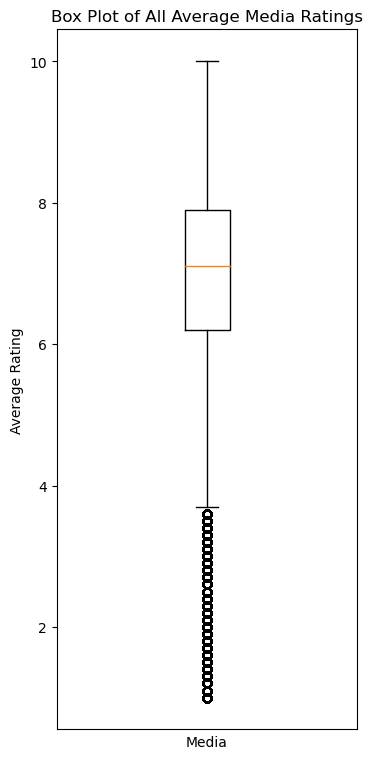

In [59]:
# Ratings box plot
fig = plt.figure(figsize=(3, 7))  # Adjust the width of the figure
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(titleRatings['averageRating'])

# Set x-ticks without the "1" tick label
ax.set_xticks([])

ax.set_xlabel('Media')
ax.set_ylabel('Average Rating')
ax.set_title('Box Plot of All Average Media Ratings')

plt.show()

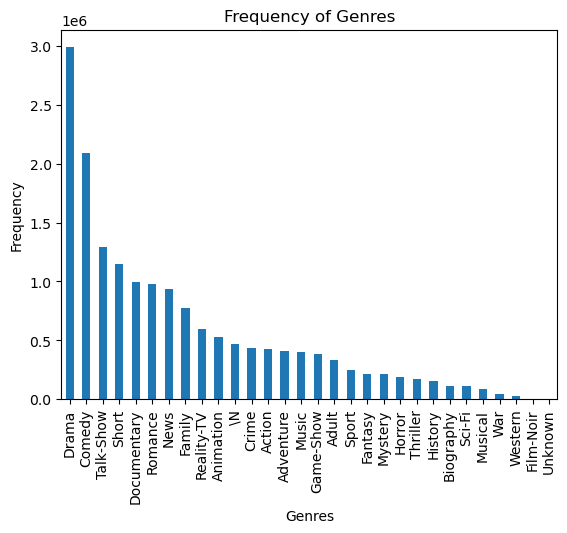

In [36]:
# Frequency of genres

genre_counts = mediaGenres['genres'].value_counts()

genre_counts.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequency of Genres')
plt.show()

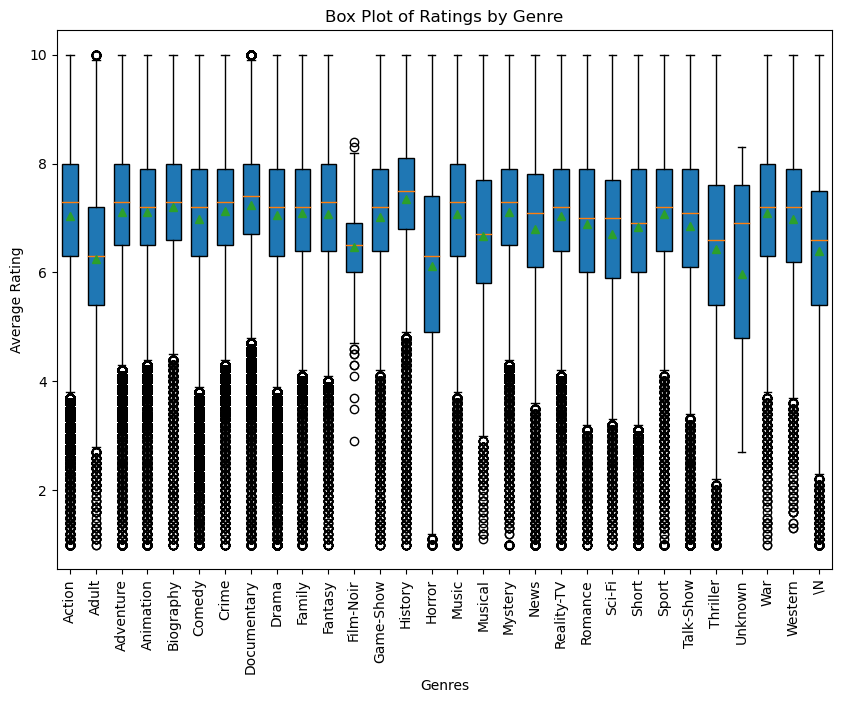

In [37]:
# Merge titleRatings and mediaGenres on titleID
merged_data = pd.merge(titleRatings, mediaGenres, on='titleID', how='inner')

# Group by genres and create box plots
fig, ax = plt.subplots(figsize=(10, 7))

# Group by genres and create box plots for each group
genre_labels = []
genre_positions = {}
for i, (genre, data) in enumerate(merged_data.groupby('genres')):
    genre_positions[genre] = i + 1
    genre_labels.append(genre)

boxplots = []

# Box plots for each genre
for genre, data in merged_data.groupby('genres'):
    positions = [genre_positions[genre]]
    boxplot = ax.boxplot(data['averageRating'], positions=positions, widths=0.6, patch_artist=True, showmeans=True)
    boxplots.append(boxplot)

ax.set_xticks(range(1, len(genre_labels) + 1))
ax.set_xticklabels(genre_labels, rotation='vertical')  # Rotate labels vertically
ax.set_xlabel('Genres')
ax.set_ylabel('Average Rating')
ax.set_title('Box Plot of Ratings by Genre')

plt.show()

Class Proportions:
class
titleBasics     0.333333
titleRatings    0.333333
mediaGenres     0.333333
Name: count, dtype: float64


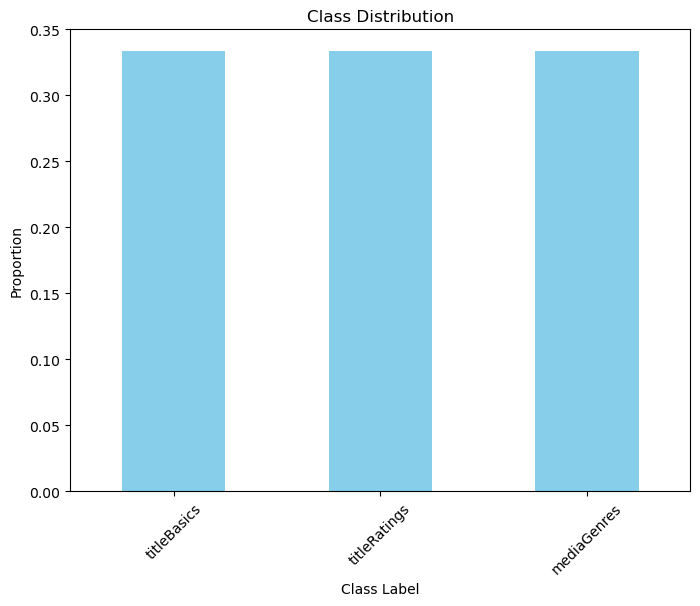

In [65]:
# class distribution
classes = pd.DataFrame({
    'class': ['titleBasics', 'titleRatings', 'mediaGenres',]
})
class_counts = classes['class'].value_counts()
class_proportions = class_counts / len(classes)
print("Class Proportions:")
print(class_proportions)
class_proportions.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()